# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [1]:
import os
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### 데이터 읽어오기


In [2]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,NaN,NaN,...,318,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,NaN,NaN,...,14,NaN,NaN,197,NaN,NaN,1,NaN,NaN,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,NaN,NaN,...,1,NaN,NaN,27,NaN,NaN,1,NaN,NaN,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,NaN,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


In [3]:
# Drop columns with more than half of the values missing
drop_cols = []
for column in train_data.columns:
    if (train_data[column].notnull().sum() // 2) < train_data[
        column
    ].isnull().sum():
        drop_cols.append(column)
train_data = train_data.drop(drop_cols, axis=1)

train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [4]:
# 각 열의 NaN 값 개수 계산
nan_counts = train_data.isnull().sum()

# NaN 값이 있는 열들만 필터링
nan_columns = nan_counts[nan_counts > 0]

nan_columns

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      12766
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    12766
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    12766
dtype: int64

In [5]:
# 각 열의 NaN 값이 있는 행을 표시
nan_dam = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].isnull()
nan_fill1 = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].isnull()
nan_fill2 = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isnull()

# 세 열의 NaN 값이 모두 같은 행에서 발생했는지 확인
nan_same_rows = nan_dam & nan_fill1 & nan_fill2

# NaN 값이 동일한 행의 개수 확인
num_same_nan_rows = nan_same_rows.sum()

# 결과 출력
print(f"세 열에서 NaN 값이 동일한 행의 개수: {num_same_nan_rows}")
print(f"세 열에서 NaN 값이 동일한 행:\n{train_data[nan_same_rows]}")

세 열에서 NaN 값이 동일한 행의 개수: 12766
세 열에서 NaN 값이 동일한 행:
      Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
12         IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
13         IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
18         IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
24         IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334507   
...            ...               ...               ...              ...   
40485      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40491      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40492      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40500      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40502      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   

       Workorder_Dam  Insp. Seq No._Dam Insp Judg

In [6]:
# 열 목록을 정의
required_columns = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2',
    'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave',
    'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave'
]

# 존재하는 열들만 필터링
existing_columns = [col for col in required_columns if col in train_data.columns]

# 존재하는 열들 출력
print("존재하는 열들:", existing_columns)

존재하는 열들: []


In [7]:
# Model.Suffix의 값이 공정에 따라 같은지 다른지 비교할 열 리스트
suffix_columns = [
    'Model.Suffix_Dam',
    'Model.Suffix_Fill1',
    'Model.Suffix_Fill2',
    'Model.Suffix_AutoClave'
]

# 각 행에 대해 모든 비교 열의 값이 동일한지 확인
all_equal = train_data[suffix_columns].nunique(axis=1) == 1

# 동일한 값을 가진 행만 필터링하여 네 개의 열만 선택
equal_rows = train_data.loc[all_equal, suffix_columns]

# 동일한 값을 가진 행의 개수와 결과 출력
print(f"동일한 값을 가진 행의 개수: {len(equal_rows)}")
print(equal_rows)

동일한 값을 가진 행의 개수: 40506
      Model.Suffix_Dam Model.Suffix_Fill1 Model.Suffix_Fill2  \
0          AJX75334505        AJX75334505        AJX75334505   
1          AJX75334505        AJX75334505        AJX75334505   
2          AJX75334501        AJX75334501        AJX75334501   
3          AJX75334501        AJX75334501        AJX75334501   
4          AJX75334501        AJX75334501        AJX75334501   
...                ...                ...                ...   
40501      AJX75334501        AJX75334501        AJX75334501   
40502      AJX75334501        AJX75334501        AJX75334501   
40503      AJX75334501        AJX75334501        AJX75334501   
40504      AJX75334501        AJX75334501        AJX75334501   
40505      AJX75334501        AJX75334501        AJX75334501   

      Model.Suffix_AutoClave  
0                AJX75334505  
1                AJX75334505  
2                AJX75334501  
3                AJX75334501  
4                AJX75334501  
...                   

In [8]:
# Workorder의 값이 공정에 따라 같은지 다른지 비교할 열 리스트
suffix_columns = [
    'Workorder_Dam',
    'Workorder_Fill1',
    'Workorder_Fill2',
    'Workorder_AutoClave'
]

# 각 행에 대해 모든 비교 열의 값이 동일한지 확인
all_equal = train_data[suffix_columns].nunique(axis=1) == 1

# 동일한 값을 가진 행만 필터링하여 네 개의 열만 선택
equal_rows = train_data.loc[all_equal, suffix_columns]

# 동일한 값을 가진 행의 개수와 결과 출력
print(f"동일한 값을 가진 행의 개수: {len(equal_rows)}")
print(equal_rows)

동일한 값을 가진 행의 개수: 40506
      Workorder_Dam Workorder_Fill1 Workorder_Fill2 Workorder_AutoClave
0        4F1XA938-1      4F1XA938-1      4F1XA938-1          4F1XA938-1
1        3KPM0016-2      3KPM0016-2      3KPM0016-2          3KPM0016-2
2        4E1X9167-1      4E1X9167-1      4E1X9167-1          4E1X9167-1
3        3K1X0057-1      3K1X0057-1      3K1X0057-1          3K1X0057-1
4        3HPM0007-1      3HPM0007-1      3HPM0007-1          3HPM0007-1
...             ...             ...             ...                 ...
40501    3J1XF434-2      3J1XF434-2      3J1XF434-2          3J1XF434-2
40502    4E1XC796-1      4E1XC796-1      4E1XC796-1          4E1XC796-1
40503    4C1XD438-1      4C1XD438-1      4C1XD438-1          4C1XD438-1
40504    3I1XA258-1      3I1XA258-1      3I1XA258-1          3I1XA258-1
40505    3G1XA501-1      3G1XA501-1      3G1XA501-1          3G1XA501-1

[40506 rows x 4 columns]


In [9]:
# 삭제할 열 리스트
columns_to_drop = [
        'Model.Suffix_Fill1', 'Model.Suffix_Fill2', 'Model.Suffix_AutoClave', 
        'Workorder_Fill1', 'Workorder_Fill2', 'Workorder_AutoClave'
]

# 열 삭제
train_data = train_data.drop(columns=columns_to_drop)

# 열 이름 변경
train_data = train_data.rename(columns={
    'Model.Suffix_Dam': 'Model.Suffix',
    'Workorder_Dam': 'Workorder'
})

train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix,Workorder,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [10]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: train_data[col].iloc[0] for col in train_data.columns if train_data[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
train_data = train_data.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

train_data

삭제된 열의 개수: 35
삭제된 열과 값:
Wip Line_Dam: IVI-OB6
Process Desc._Dam: Dam Dispenser
Insp. Seq No._Dam: 1
Insp Judge Code_Dam: OK
CURE STANDBY POSITION X Collect Result_Dam: 1150
CURE STANDBY POSITION Z Collect Result_Dam: 33.5
CURE STANDBY POSITION Θ Collect Result_Dam: 0
CURE START POSITION Z Collect Result_Dam: 33.5
Wip Line_AutoClave: IVI-OB6
Process Desc._AutoClave: Auto Clave Out
Equipment_AutoClave: Auto Clave Out
Insp. Seq No._AutoClave: 1
Insp Judge Code_AutoClave: OK
1st Pressure Judge Value_AutoClave: OK
2nd Pressure Judge Value_AutoClave: OK
3rd Pressure Judge Value_AutoClave: OK
Wip Line_Fill1: IVI-OB6
Process Desc._Fill1: Fill1 Dispenser
Insp. Seq No._Fill1: 1
Insp Judge Code_Fill1: OK
Wip Line_Fill2: IVI-OB6
Process Desc._Fill2: Fill2 Dispenser
Insp. Seq No._Fill2: 1
Insp Judge Code_Fill2: OK
CURE END POSITION Θ Collect Result_Fill2: -90
CURE STANDBY POSITION X Collect Result_Fill2: 1020
CURE STANDBY POSITION Θ Collect Result_Fill2: 0
CURE START POSITION Θ Collect Result_Fill2

,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,280,90,10,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,Dam dispenser #2,AJX75334501,4E1XC796-1,1000.0,12.5,90,100,280,90,16,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,Dam dispenser #1,AJX75334501,4C1XD438-1,240.0,2.5,-90,100,1030,-90,16,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,280,90,10,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [11]:
# 열 이름 정의
target_column = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 열의 값들 확인
if target_column not in train_data.columns:
    raise ValueError(f"열 '{target_column}'이(가) 데이터프레임에 없습니다.")

# 고유한 값 추출
unique_values = train_data[target_column].unique()

# 고유한 값들을 포함한 DataFrame 생성
unique_values_df = pd.DataFrame(unique_values, columns=[target_column])

# 결측치와 문자열 포함 모든 고유 값 출력
print(f"'{target_column}' 열의 고유한 값들:")
print(unique_values_df)

# 추가로 결측치와 특정 값('OK')의 존재 여부 확인
nan_count = train_data[target_column].isna().sum()
ok_count = (train_data[target_column] == 'OK').sum()

print(f"\n결측치(NaN) 개수: {nan_count}")
print(f"'OK' 값 개수: {ok_count}")

'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam' 열의 고유한 값들:
  HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
0                                                NaN      
1                                              550.3      
2                                                 OK      
3                                              162.4      
4                                                549      
5                                              549.5      
6                                                550      
7                                              548.5      

결측치(NaN) 개수: 12766
'OK' 값 개수: 11293


In [12]:
# 열 이름 정의
column_name = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 열이 데이터프레임에 존재하는지 확인
if column_name not in train_data.columns:
    raise ValueError(f"열 '{column_name}'이(가) 데이터프레임에 없습니다.")

# 해당 열의 모든 값이 숫자인지 확인
has_numeric = train_data[column_name].apply(pd.to_numeric, errors='coerce').notna().any()

# 결과 출력
if has_numeric:
    print(f"열 '{column_name}'에는 숫자가 포함되어 있습니다.")
else:
    print(f"열 '{column_name}'에는 숫자가 포함되어 있지 않습니다.")


열 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'에는 숫자가 포함되어 있습니다.


In [13]:
# 열 이름 정의
column_name = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 데이터프레임에서 숫자와 숫자가 아닌 값으로 구분하여 두 개의 데이터프레임 생성
train_noshift = train_data[pd.to_numeric(train_data[column_name], errors='coerce').notna()]
train_shift = train_data[pd.to_numeric(train_data[column_name], errors='coerce').isna() | (train_data[column_name] == 'OK')]

# 결과 출력
print("숫자인 경우의 데이터프레임 (train_noshift):")
print(train_noshift)

print("\n숫자가 아닌 경우의 데이터프레임 (train_shift):")
print(train_shift)

# 결과파일 저장
# train_noshift.to_csv('train_noshift.csv', index=False)
# train_shift.to_csv('train_shift.csv', index=False)

숫자인 경우의 데이터프레임 (train_noshift):
          Equipment_Dam Model.Suffix   Workorder  \
1      Dam dispenser #1  AJX75334505  3KPM0016-2   
3      Dam dispenser #2  AJX75334501  3K1X0057-1   
4      Dam dispenser #1  AJX75334501  3HPM0007-1   
5      Dam dispenser #1  AJX75334501  3G1X8297-2   
8      Dam dispenser #1  AJX75334501  3H1X9883-1   
...                 ...          ...         ...   
40497  Dam dispenser #1  AJX75334501  3H1XC952-1   
40498  Dam dispenser #1  AJX75334501  3H1X7981-1   
40501  Dam dispenser #1  AJX75334501  3J1XF434-2   
40504  Dam dispenser #2  AJX75334501  3I1XA258-1   
40505  Dam dispenser #1  AJX75334501  3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  \
1                                       240.0   
3                                      1000.0   
4                                       240.0   
5                                       240.0   
8                                       240.0   
...                                       ...   


In [14]:
# 열 이름 정의
column_fill1 = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'

# train_noshift1 및 train_shift1 데이터프레임 생성
train_noshift1 = train_data[pd.to_numeric(train_data[column_fill1], errors='coerce').notna()]
train_shift1 = train_data[pd.to_numeric(train_data[column_fill1], errors='coerce').isna() | (train_data[column_fill1] == 'OK')]

# train_shift와 train_shift1 데이터프레임이 같은지 확인
def are_dataframes_equal(df1, df2):
    return df1.equals(df2)

# train_shift와 train_shift1 비교
dataframes_equal = are_dataframes_equal(train_shift, train_shift1)

# 결과 출력
print("숫자인 경우의 데이터프레임 (train_noshift1):")
print(train_noshift1)

print("\n숫자가 아닌 경우의 데이터프레임 (train_shift1):")
print(train_shift1)

print("\ntrain_shift와 train_shift1이 같은가요?:", dataframes_equal)

숫자인 경우의 데이터프레임 (train_noshift1):
          Equipment_Dam Model.Suffix   Workorder  \
1      Dam dispenser #1  AJX75334505  3KPM0016-2   
3      Dam dispenser #2  AJX75334501  3K1X0057-1   
4      Dam dispenser #1  AJX75334501  3HPM0007-1   
5      Dam dispenser #1  AJX75334501  3G1X8297-2   
8      Dam dispenser #1  AJX75334501  3H1X9883-1   
...                 ...          ...         ...   
40497  Dam dispenser #1  AJX75334501  3H1XC952-1   
40498  Dam dispenser #1  AJX75334501  3H1X7981-1   
40501  Dam dispenser #1  AJX75334501  3J1XF434-2   
40504  Dam dispenser #2  AJX75334501  3I1XA258-1   
40505  Dam dispenser #1  AJX75334501  3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  \
1                                       240.0   
3                                      1000.0   
4                                       240.0   
5                                       240.0   
8                                       240.0   
...                                       ...   

In [15]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'
end_col = 'WorkMode Collect Result_Dam'

# 열 인덱스 찾기
start_index = train_shift.columns.get_loc(start_col)
end_index = train_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = train_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    train_shift[col] = shifted_values.iloc[:, i]

/tmp/ipykernel_184/2970819967.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_shift[col] = shifted_values.iloc[:, i]


In [16]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'
end_col = 'WorkMode Collect Result_Fill1'

# 열 인덱스 찾기
start_index = train_shift.columns.get_loc(start_col)
end_index = train_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = train_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    train_shift[col] = shifted_values.iloc[:, i]

/tmp/ipykernel_184/3756343480.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_shift[col] = shifted_values.iloc[:, i]


In [17]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'
end_col = 'WorkMode Collect Result_Fill2'

# 열 인덱스 찾기
start_index = train_shift.columns.get_loc(start_col)
end_index = train_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = train_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    train_shift[col] = shifted_values.iloc[:, i]

# 결과를 파일로 저장
# train_shift.to_csv('train_shift_corrected.csv', index=False)

/tmp/ipykernel_184/2277645347.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_shift[col] = shifted_values.iloc[:, i]


In [18]:
# 열 순서 출력
print("열 순서:")
for i, col in enumerate(train_shift.columns, start=1):
    print(f"{i}: {col}")

열 순서:
1: Equipment_Dam
2: Model.Suffix
3: Workorder
4: CURE END POSITION X Collect Result_Dam
5: CURE END POSITION Z Collect Result_Dam
6: CURE END POSITION Θ Collect Result_Dam
7: CURE SPEED Collect Result_Dam
8: CURE START POSITION X Collect Result_Dam
9: CURE START POSITION Θ Collect Result_Dam
10: DISCHARGED SPEED OF RESIN Collect Result_Dam
11: DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
12: DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
13: DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
14: Dispense Volume(Stage1) Collect Result_Dam
15: Dispense Volume(Stage2) Collect Result_Dam
16: Dispense Volume(Stage3) Collect Result_Dam
17: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
18: HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
19: HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
20: HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
21: HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
22: HEAD NORMAL COORDINATE Y AXIS(Stag

In [19]:
# 열 순서 출력
print("열 순서:")
for i, col in enumerate(train_noshift.columns, start=1):
    print(f"{i}: {col}")

열 순서:
1: Equipment_Dam
2: Model.Suffix
3: Workorder
4: CURE END POSITION X Collect Result_Dam
5: CURE END POSITION Z Collect Result_Dam
6: CURE END POSITION Θ Collect Result_Dam
7: CURE SPEED Collect Result_Dam
8: CURE START POSITION X Collect Result_Dam
9: CURE START POSITION Θ Collect Result_Dam
10: DISCHARGED SPEED OF RESIN Collect Result_Dam
11: DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
12: DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
13: DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
14: Dispense Volume(Stage1) Collect Result_Dam
15: Dispense Volume(Stage2) Collect Result_Dam
16: Dispense Volume(Stage3) Collect Result_Dam
17: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
18: HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
19: HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
20: HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
21: HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
22: HEAD NORMAL COORDINATE Y AXIS(Stag

In [20]:
# 두 데이터프레임 합치기
combined_df = pd.concat([train_shift, train_noshift], axis=0)
combined_df = combined_df.sort_index()

# 제거할 열 리스트
columns_to_drop = ['WorkMode Collect Result_Dam', 'WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2']

# 지정한 열 제거
combined_df = combined_df.drop(columns=columns_to_drop)

# 결과를 CSV 파일로 저장
combined_df.to_csv('train_shift_final.csv', index=False)

combined_df

,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,50.0,91.8,270.0,50,114.612,19.9,7.0,127,1,Normal
1,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,50.0,91.8,270.0,50,114.612,19.8,10.0,73,1,Normal
2,Dam dispenser #1,AJX75334501,3M1XH425-1,240.0,2.5,-90,70,1030,-90,16,...,50.0,91.8,270.0,50,85.000,19.7,8.0,483,1,Normal
3,Dam dispenser #2,AJX75334501,4A1XB542-4,1000.0,12.5,90,70,280,90,16,...,50.0,91.8,270.0,50,85.000,19.9,11.0,105,1,Normal
4,Dam dispenser #2,AJX75334501,4E1X9168-1,1000.0,12.5,90,85,280,90,16,...,50.0,91.8,270.0,50,114.612,20.0,15.0,78,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,3H1XC952-1,240.0,2.5,-90,70,1030,-90,10,...,50.0,91.8,270.0,50,85.000,19.6,2.0,56,1,Normal
40502,Dam dispenser #1,AJX75334501,3H1X7981-1,240.0,2.5,-90,70,1030,-90,10,...,50.0,91.8,270.0,50,85.000,19.3,8.0,329,1,Normal
40503,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1030,-90,10,...,50.0,91.8,270.0,50,85.000,19.2,1.0,318,1,Normal
40504,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,280,90,10,...,50.0,91.8,270.0,50,85.000,20.1,13.0,117,1,Normal


In [21]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: combined_df[col].iloc[0] for col in combined_df.columns if combined_df[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
combined_df = combined_df.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

combined_df

삭제된 열의 개수: 24
삭제된 열과 값:
HEAD Standby Position X Collect Result_Dam: 257.0
HEAD Standby Position Y Collect Result_Dam: 66
HEAD Standby Position Z Collect Result_Dam: 0.0
Head Clean Position X Collect Result_Dam: 127.5
Head Clean Position Y Collect Result_Dam: 66.0
Head Purge Position X Collect Result_Dam: 257.0
Head Purge Position Y Collect Result_Dam: 66.0
Head Zero Position X Collect Result_Dam: 505.0
HEAD Standby Position X Collect Result_Fill1: 289.0
HEAD Standby Position Y Collect Result_Fill1: 50
HEAD Standby Position Z Collect Result_Fill1: 0.0
Head Clean Position X Collect Result_Fill1: 123.4
Head Clean Position Y Collect Result_Fill1: 50.0
Head Clean Position Z Collect Result_Fill1: 92.2
Head Purge Position X Collect Result_Fill1: 289.0
Head Purge Position Y Collect Result_Fill1: 50
HEAD Standby Position X Collect Result_Fill2: 270.0
HEAD Standby Position Y Collect Result_Fill2: 50
HEAD Standby Position Z Collect Result_Fill2: -10
Head Clean Position X Collect Result_Fill2: 119

,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,428.0,243.7,243.7,243.7,114.612,19.9,7.0,127,1,Normal
1,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,1324.2,243.5,243.5,243.5,114.612,19.8,10.0,73,1,Normal
2,Dam dispenser #1,AJX75334501,3M1XH425-1,240.0,2.5,-90,70,1030,-90,16,...,428.0,243.7,243.7,243.7,85.000,19.7,8.0,483,1,Normal
3,Dam dispenser #2,AJX75334501,4A1XB542-4,1000.0,12.5,90,70,280,90,16,...,1324.2,243.5,243.5,243.5,85.000,19.9,11.0,105,1,Normal
4,Dam dispenser #2,AJX75334501,4E1X9168-1,1000.0,12.5,90,85,280,90,16,...,1324.2,243.5,243.5,243.5,114.612,20.0,15.0,78,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,3H1XC952-1,240.0,2.5,-90,70,1030,-90,10,...,428.0,243.7,243.7,243.7,85.000,19.6,2.0,56,1,Normal
40502,Dam dispenser #1,AJX75334501,3H1X7981-1,240.0,2.5,-90,70,1030,-90,10,...,428.0,243.7,243.7,243.7,85.000,19.3,8.0,329,1,Normal
40503,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1030,-90,10,...,428.0,243.7,243.7,243.7,85.000,19.2,1.0,318,1,Normal
40504,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,280,90,10,...,1324.2,243.5,243.5,243.5,85.000,20.1,13.0,117,1,Normal


In [22]:
# 각 열의 NaN 값 개수 계산
nan_counts = combined_df.isnull().sum()

# NaN 값이 있는 열들만 필터링
nan_columns = nan_counts[nan_counts > 0]

nan_columns

Series([], dtype: int64)

In [23]:
# 문자열 타입인 열들의 이름과 데이터 타입 출력
string_columns = combined_df.select_dtypes(include='object')
string_columns.dtypes

Equipment_Dam                                                 object
Model.Suffix                                                  object
Workorder                                                     object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      object
Chamber Temp. Judge Value_AutoClave                           object
Equipment_Fill1                                               object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    object
Equipment_Fill2                                               object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    object
target                                                        object
dtype: object

In [24]:
# 변환할 열들의 리스트
columns_to_convert = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']

# 각 열을 float로 변환
for col in columns_to_convert:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

combined_df[columns_to_convert].dtypes

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    float64
dtype: object

In [25]:
from itertools import combinations
from collections import defaultdict

# 동일한 값을 가지는 열 쌍을 저장할 리스트
equal_columns = []

# 열 이름들의 모든 쌍을 생성하여 비교
for col1, col2 in combinations(combined_df.columns, 2):
    if combined_df[col1].equals(combined_df[col2]):
        equal_columns.append((col1, col2))

# 열 쌍을 그룹화하여 저장할 딕셔너리
grouped_columns = defaultdict(set)

# 열 쌍을 그룹화
for col1, col2 in equal_columns:
    grouped_columns[col1].add(col2)
    grouped_columns[col2].add(col1)

# 방문한 열을 추적할 집합
visited = set()

# 그룹화된 열 쌍 출력
print("같은 값을 가지는 열 그룹:")
for col, group in grouped_columns.items():
    if col not in visited:
        # 현재 열과 연결된 모든 열을 그룹으로 묶기
        group.add(col)
        visited.update(group)
        print(f"그룹: {', '.join(group)}")

같은 값을 가지는 열 그룹:
그룹: CURE END POSITION Θ Collect Result_Dam, CURE START POSITION Θ Collect Result_Dam
그룹: HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam, HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam, HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
그룹: Stage1 Circle1 Distance Speed Collect Result_Dam, Stage1 Circle4 Distance Speed Collect Result_Dam, Stage1 Circle3 Distance Speed Collect Result_Dam, Stage1 Line2 Distance Speed Collect Result_Dam, Stage1 Line4 Distance Speed Collect Result_Dam, Stage1 Circle2 Distance Speed Collect Result_Dam
그룹: Stage2 Circle3 Distance Speed Collect Result_Dam, Stage2 Circle1 Distance Speed Collect Result_Dam, Stage2 Circle2 Distance Speed Collect Result_Dam, Stage2 Circle4 Distance Speed Collect Result_Dam
그룹: Stage2 Line4 Distance Speed Collect Result_Dam, Stage2 Line2 Distance Speed Collect Result_Dam
그룹: Stage3 Circle4 Distance Speed Collect Result_Dam, Stage3 Circle3 Distance Speed Collect Result_Dam, Stage3 Line4 Dist

In [26]:
# 확인하기

# 비교할 열 리스트
columns_to_compare = [
    'Stage3 Circle1 Distance Speed Collect Result_Dam',
    'Stage3 Circle2 Distance Speed Collect Result_Dam',
    'Stage3 Circle3 Distance Speed Collect Result_Dam',
    'Stage3 Circle4 Distance Speed Collect Result_Dam',
    'Stage3 Line2 Distance Speed Collect Result_Dam',
    'Stage3 Line4 Distance Speed Collect Result_Dam' 

]

# 선택한 열 데이터만 포함하는 데이터프레임 생성
df_comparison = combined_df[columns_to_compare]

# 모든 행에 대해 열 값이 동일한지 확인
all_rows_identical = df_comparison.nunique(axis=1).eq(1).all()

if all_rows_identical:
    print("모든 행에서 열들의 값이 동일합니다.")
else:
    print("일부 행에서 열들의 값이 동일하지 않습니다.")

모든 행에서 열들의 값이 동일합니다.


In [27]:
# 삭제할 열 목록
columns_to_drop = [
    'CURE END POSITION Θ Collect Result_Dam',

    'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
    'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',

    'Stage1 Circle2 Distance Speed Collect Result_Dam',
    'Stage1 Circle3 Distance Speed Collect Result_Dam',
    'Stage1 Circle4 Distance Speed Collect Result_Dam',
    'Stage1 Line2 Distance Speed Collect Result_Dam',
    'Stage1 Line4 Distance Speed Collect Result_Dam',

    'Stage2 Circle2 Distance Speed Collect Result_Dam',
    'Stage2 Circle3 Distance Speed Collect Result_Dam',
    'Stage2 Circle4 Distance Speed Collect Result_Dam',

    'Stage2 Line4 Distance Speed Collect Result_Dam',

    'Stage3 Circle2 Distance Speed Collect Result_Dam',
    'Stage3 Circle3 Distance Speed Collect Result_Dam',
    'Stage3 Circle4 Distance Speed Collect Result_Dam',
    'Stage3 Line2 Distance Speed Collect Result_Dam',
    'Stage3 Line4 Distance Speed Collect Result_Dam',

    'CURE STANDBY POSITION Z Collect Result_Fill2',

    'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',

    'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
    'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2',
    
    'Workorder'
]

# 열 삭제
combined_df = combined_df.drop(columns=columns_to_drop)

# 결과 확인
combined_df

,Equipment_Dam,Model.Suffix,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,...,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,240.0,2.5,100,1030,-90,16,14.9,8.4,...,156.0,428.0,427.9,243.7,114.612,19.9,7.0,127,1,Normal
1,Dam dispenser #2,AJX75334501,1000.0,12.5,85,280,90,16,14.7,8.5,...,694.0,1324.2,1324.2,243.5,114.612,19.8,10.0,73,1,Normal
2,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,16,13.2,6.5,...,156.0,428.0,427.9,243.7,85.000,19.7,8.0,483,1,Normal
3,Dam dispenser #2,AJX75334501,1000.0,12.5,70,280,90,16,13.2,7.6,...,694.0,1324.2,1324.2,243.5,85.000,19.9,11.0,105,1,Normal
4,Dam dispenser #2,AJX75334501,1000.0,12.5,85,280,90,16,14.7,8.5,...,694.0,1324.2,1324.2,243.5,114.612,20.0,15.0,78,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,10,9.7,4.9,...,156.0,428.0,427.9,243.7,85.000,19.6,2.0,56,1,Normal
40502,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,10,9.7,4.9,...,156.0,428.0,427.9,243.7,85.000,19.3,8.0,329,1,Normal
40503,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,10,17.0,5.0,...,156.0,428.0,427.9,243.7,85.000,19.2,1.0,318,1,Normal
40504,Dam dispenser #2,AJX75334501,1000.0,12.5,70,280,90,10,9.7,4.9,...,694.0,1324.2,1324.2,243.5,85.000,20.1,13.0,117,1,Normal


In [28]:
combined_df.to_csv('train_cleaned.csv', index=False)

In [29]:
combined_df

,Equipment_Dam,Model.Suffix,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,...,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,240.0,2.5,100,1030,-90,16,14.9,8.4,...,156.0,428.0,427.9,243.7,114.612,19.9,7.0,127,1,Normal
1,Dam dispenser #2,AJX75334501,1000.0,12.5,85,280,90,16,14.7,8.5,...,694.0,1324.2,1324.2,243.5,114.612,19.8,10.0,73,1,Normal
2,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,16,13.2,6.5,...,156.0,428.0,427.9,243.7,85.000,19.7,8.0,483,1,Normal
3,Dam dispenser #2,AJX75334501,1000.0,12.5,70,280,90,16,13.2,7.6,...,694.0,1324.2,1324.2,243.5,85.000,19.9,11.0,105,1,Normal
4,Dam dispenser #2,AJX75334501,1000.0,12.5,85,280,90,16,14.7,8.5,...,694.0,1324.2,1324.2,243.5,114.612,20.0,15.0,78,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,10,9.7,4.9,...,156.0,428.0,427.9,243.7,85.000,19.6,2.0,56,1,Normal
40502,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,10,9.7,4.9,...,156.0,428.0,427.9,243.7,85.000,19.3,8.0,329,1,Normal
40503,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,10,17.0,5.0,...,156.0,428.0,427.9,243.7,85.000,19.2,1.0,318,1,Normal
40504,Dam dispenser #2,AJX75334501,1000.0,12.5,70,280,90,10,9.7,4.9,...,694.0,1324.2,1324.2,243.5,85.000,20.1,13.0,117,1,Normal


In [30]:
# Feature Selection
# 장비의 차이는 없으면서 Normal과 Abnormal 크게 차이나는 특성
select_feature = ["Equipment_Dam","Equipment_Fill1","Equipment_Fill2",
                "PalletID Collect Result_Dam","PalletID Collect Result_Fill1","PalletID Collect Result_Fill2",
                  "Production Qty Collect Result_Dam","Production Qty Collect Result_Fill1","Production Qty Collect Result_Fill2", 
                  "Receip No Collect Result_Dam","Receip No Collect Result_Fill1","Receip No Collect Result_Fill2",
"DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam",
"DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam",
"Dispense Volume(Stage1) Collect Result_Dam",
"Dispense Volume(Stage3) Collect Result_Dam",
"Machine Tact time Collect Result_Dam",
"Stage1 Circle1 Distance Speed Collect Result_Dam",
"Stage1 Line1 Distance Speed Collect Result_Dam",
"Stage1 Line3 Distance Speed Collect Result_Dam",
"Stage3 Circle1 Distance Speed Collect Result_Dam",
"Stage3 Line1 Distance Speed Collect Result_Dam",
"Stage3 Line3 Distance Speed Collect Result_Dam",
"1st Pressure 1st Pressure Unit Time_AutoClave",
"2nd Pressure Unit Time_AutoClave",
"3rd Pressure Unit Time_AutoClave",
"Chamber Temp. Collect Result_AutoClave",
"Chamber Temp. Unit Time_AutoClave",
"Machine Tact time Collect Result_Fill1",


                  
'target']

my_df = combined_df[select_feature]

In [31]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 정상과 불량 데이터로 나누기
# normal_data = my_df[my_df['target'] == 'Normal']
# abnormal_data = my_df[my_df['target'] == 'AbNormal']

# # 수치형 데이터만 선택
# numeric_columns = my_df.select_dtypes(include=['float64', 'int64']).columns

# # 시각화
# plt.figure(figsize=(20, 50))
# for i, column in enumerate(numeric_columns, 1):
#     plt.subplot(len(numeric_columns), 2, 2 * i - 1)
#     sns.histplot(normal_data[column], kde=True, color='skyblue', label='Normal', bins=20)
#     sns.histplot(abnormal_data[column], kde=True, color='red', label='AbNormal', bins=20)
#     plt.title(f'Histogram of {column} by target')
#     plt.legend()

#     plt.subplot(len(numeric_columns), 2, 2 * i)
#     sns.boxplot(data=my_df, x='target', y=column, palette={'Normal': 'skyblue', 'AbNormal': 'red'})
#     plt.title(f'Boxplot of {column} by target')

# plt.tight_layout()
# plt.show()


In [32]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 정상과 불량 데이터로 나누기
# normal_data = train_data[train_data['target'] == 'Normal']
# abnormal_data = train_data[train_data['target'] == 'AbNormal']

# # 장비 1과 2의 데이터로 나누기
# normal_data_equip1 = normal_data[normal_data['Equipment_Dam'] == 0]
# normal_data_equip2 = normal_data[normal_data['Equipment_Dam'] == 1]
# abnormal_data_equip1 = abnormal_data[abnormal_data['Equipment_Dam'] == 0]
# abnormal_data_equip2 = abnormal_data[abnormal_data['Equipment_Dam'] == 1]

# # 수치형 데이터만 선택
# numeric_columns = my_df.select_dtypes(include=['float64', 'int64']).columns

# # 시각화
# plt.figure(figsize=(20, 50))
# for i, column in enumerate(numeric_columns, 1):
#     plt.subplot(len(numeric_columns), 2, 2 * i - 1)
    
#     # 장비 1과 2에 대해 정상 및 불량 데이터를 히스토그램으로 시각화
#     sns.histplot(normal_data_equip1[column], kde=True, color='skyblue', label='Normal Equip 1', bins=20)
#     sns.histplot(normal_data_equip2[column], kde=True, color='lightblue', label='Normal Equip 2', bins=20)
#     sns.histplot(abnormal_data_equip1[column], kde=True, color='red', label='AbNormal Equip 1', bins=20)
#     sns.histplot(abnormal_data_equip2[column], kde=True, color='darkred', label='AbNormal Equip 2', bins=20)
#     plt.title(f'Histogram of {column} by Equipment and Target')
#     plt.legend(loc='best')

#     plt.subplot(len(numeric_columns), 2, 2 * i)
    
#     # 장비 1과 2에 대해 정상 및 불량 데이터의 박스플롯 시각화
#     sns.boxplot(data=my_df, x='Equipment_Dam', y=column, hue='target', palette={'Normal': 'skyblue', 'AbNormal': 'red'})
#     plt.title(f'Boxplot of {column} by Equipment and Target')

# plt.tight_layout()
# plt.show()


# ~~~~ 코드 수정 ~~~~~

In [33]:
# 학습을 위해 train_data를 지정, combined_df는 train_cleaned.csv로 저장된 데이터와 같음
train_data = my_df
train_data

,Equipment_Dam,Equipment_Fill1,Equipment_Fill2,PalletID Collect Result_Dam,PalletID Collect Result_Fill1,PalletID Collect Result_Fill2,Production Qty Collect Result_Dam,Production Qty Collect Result_Fill1,Production Qty Collect Result_Fill2,Receip No Collect Result_Dam,...,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Machine Tact time Collect Result_Fill1,target
0,Dam dispenser #1,Fill1 dispenser #1,Fill2 dispenser #1,7.0,7.0,7.0,127,127,127,1,...,5800,5800,5800,240,1,120,54,361,55.7,Normal
1,Dam dispenser #2,Fill1 dispenser #2,Fill2 dispenser #2,10.0,10.0,10.0,73,73,73,1,...,5800,5800,5800,241,1,121,56,363,58.7,Normal
2,Dam dispenser #1,Fill1 dispenser #1,Fill2 dispenser #1,8.0,8.0,8.0,483,483,483,1,...,6500,6500,6500,241,1,121,54,363,52.6,Normal
3,Dam dispenser #2,Fill1 dispenser #2,Fill2 dispenser #2,11.0,11.0,11.0,105,105,105,1,...,6500,6500,6500,241,1,121,52,363,57.2,Normal
4,Dam dispenser #2,Fill1 dispenser #2,Fill2 dispenser #2,15.0,15.0,15.0,78,78,78,1,...,5800,5800,5800,241,1,121,51,363,58.6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,Fill1 dispenser #1,Fill2 dispenser #1,2.0,2.0,2.0,56,56,56,1,...,9000,9000,9000,240,120,120,49,480,90.2,Normal
40502,Dam dispenser #1,Fill1 dispenser #1,Fill2 dispenser #1,8.0,8.0,8.0,329,329,329,1,...,9000,9000,9000,241,120,120,50,481,90.0,Normal
40503,Dam dispenser #1,Fill1 dispenser #1,Fill2 dispenser #1,1.0,1.0,1.0,318,318,318,1,...,5000,5000,5000,241,121,121,54,483,51.8,Normal
40504,Dam dispenser #2,Fill1 dispenser #2,Fill2 dispenser #2,13.0,13.0,13.0,117,117,117,1,...,9000,9000,9000,241,121,121,54,483,57.4,Normal


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

# 범주형 열을 선택하여 인코딩 수행
categorical_features = ['Equipment_Dam', 'Equipment_Fill1', 'Equipment_Fill2']

# OrdinalEncoder 인스턴스 생성
encoder = OrdinalEncoder()

# 범주형 열에 대해서만 인코딩 수행
train_data[categorical_features] = encoder.fit_transform(train_data[categorical_features])

# 인코딩된 데이터프레임 확인
train_data

/tmp/ipykernel_184/1646164743.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[categorical_features] = encoder.fit_transform(train_data[categorical_features])


,Equipment_Dam,Equipment_Fill1,Equipment_Fill2,PalletID Collect Result_Dam,PalletID Collect Result_Fill1,PalletID Collect Result_Fill2,Production Qty Collect Result_Dam,Production Qty Collect Result_Fill1,Production Qty Collect Result_Fill2,Receip No Collect Result_Dam,...,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Machine Tact time Collect Result_Fill1,target
0,0.0,0.0,0.0,7.0,7.0,7.0,127,127,127,1,...,5800,5800,5800,240,1,120,54,361,55.7,Normal
1,1.0,1.0,1.0,10.0,10.0,10.0,73,73,73,1,...,5800,5800,5800,241,1,121,56,363,58.7,Normal
2,0.0,0.0,0.0,8.0,8.0,8.0,483,483,483,1,...,6500,6500,6500,241,1,121,54,363,52.6,Normal
3,1.0,1.0,1.0,11.0,11.0,11.0,105,105,105,1,...,6500,6500,6500,241,1,121,52,363,57.2,Normal
4,1.0,1.0,1.0,15.0,15.0,15.0,78,78,78,1,...,5800,5800,5800,241,1,121,51,363,58.6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,0.0,0.0,0.0,2.0,2.0,2.0,56,56,56,1,...,9000,9000,9000,240,120,120,49,480,90.2,Normal
40502,0.0,0.0,0.0,8.0,8.0,8.0,329,329,329,1,...,9000,9000,9000,241,120,120,50,481,90.0,Normal
40503,0.0,0.0,0.0,1.0,1.0,1.0,318,318,318,1,...,5000,5000,5000,241,121,121,54,483,51.8,Normal
40504,1.0,1.0,1.0,13.0,13.0,13.0,117,117,117,1,...,9000,9000,9000,241,121,121,54,483,57.4,Normal


In [35]:
# 각 범주에 대한 인코딩 값 확인
for feature, categories in zip(categorical_features, encoder.categories_):
    print(f"Feature: {feature}")
    for category, index in zip(categories, range(len(categories))):
        print(f"  {category}: {index}")

Feature: Equipment_Dam
  Dam dispenser #1: 0
  Dam dispenser #2: 1
Feature: Equipment_Fill1
  Fill1 dispenser #1: 0
  Fill1 dispenser #2: 1
Feature: Equipment_Fill2
  Fill2 dispenser #1: 0
  Fill2 dispenser #2: 1


# 전처리 끝!!!

In [36]:
# 언더샘플링

In [37]:
condition_receip = (
    (train_data['Receip No Collect Result_Dam'] != train_data['Receip No Collect Result_Fill1']) |
    (train_data['Receip No Collect Result_Dam'] != train_data['Receip No Collect Result_Fill2']) |
    (train_data['Receip No Collect Result_Fill1'] != train_data['Receip No Collect Result_Fill2'])
)

condition_production_qty = (
    (train_data['Production Qty Collect Result_Dam'] != train_data['Production Qty Collect Result_Fill1']) |
    (train_data['Production Qty Collect Result_Dam'] != train_data['Production Qty Collect Result_Fill2']) |
    (train_data['Production Qty Collect Result_Fill1'] != train_data['Production Qty Collect Result_Fill2'])
)

condition_palletid = (
    (train_data['PalletID Collect Result_Dam'] != train_data['PalletID Collect Result_Fill1']) |
    (train_data['PalletID Collect Result_Dam'] != train_data['PalletID Collect Result_Fill2']) |
    (train_data['PalletID Collect Result_Fill1'] != train_data['PalletID Collect Result_Fill2'])
)

# 장비가 다르면 불량으로 분류
equip1 = train_data[categorical_features].eq(0).all(axis=1)
equip2 = train_data[categorical_features].eq(1).all(axis=1)
condition_equip_different = ~equip1 & ~equip2

# 네 조건 중 하나라도 만족하면 불량으로 분류
condition_abnormal = condition_receip | condition_production_qty | condition_palletid | condition_equip_different

train_data
# 불량 데이터와 정상 데이터로 분리
df_match_abnormal = train_data[condition_abnormal]  # 매치 불량 데이터
df_filtered = train_data[~condition_abnormal]  # 정상 데이터

# 정상 데이터에서 장비별로 데이터 분리
df_model1 = df_filtered[df_filtered[categorical_features].eq(0).all(axis=1)]
df_model2 = df_filtered[df_filtered[categorical_features].eq(1).all(axis=1)]

# 결과 확인
print(f"불량 데이터: {len(df_match_abnormal)} 행")
print(f"정상 데이터: {len(df_filtered)} 행")
print(f"Equipment #1 데이터: {len(df_model1)} 행")
print(f"Equipment #2 데이터: {len(df_model2)} 행")

불량 데이터: 94 행
정상 데이터: 40412 행
Equipment #1 데이터: 24968 행
Equipment #2 데이터: 15444 행


In [38]:
# normal_ratio = 1.0  # 1.0 means 1:1 ratio

# df_normal = df_filtered[df_filtered["target"] == "Normal"]
# df_abnormal = df_filtered[df_filtered["target"] == "AbNormal"]

# num_normal = len(df_normal)
# num_abnormal = len(df_abnormal)
# print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

# df_normal = df_normal.sample(n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE)
# df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
# df_concat.value_counts("target")

df_concat = df_filtered.copy()

In [39]:
# 구분하느라 사용한 학습에 필요없는 컬럼 제외 
remove_columns=["Equipment_Dam","Equipment_Fill1","Equipment_Fill2",
                "PalletID Collect Result_Dam","PalletID Collect Result_Fill1","PalletID Collect Result_Fill2",
                  "Production Qty Collect Result_Dam","Production Qty Collect Result_Fill1","Production Qty Collect Result_Fill2", 
                  "Receip No Collect Result_Dam","Receip No Collect Result_Fill1","Receip No Collect Result_Fill2"]
# 데이터프레임에서 컬럼 제거
df_concat.drop(columns=remove_columns, inplace=True)

In [40]:
df_concat.dtypes

DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam    float64
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam    float64
Dispense Volume(Stage1) Collect Result_Dam             float64
Dispense Volume(Stage3) Collect Result_Dam             float64
Machine Tact time Collect Result_Dam                   float64
Stage1 Circle1 Distance Speed Collect Result_Dam         int64
Stage1 Line1 Distance Speed Collect Result_Dam           int64
Stage1 Line3 Distance Speed Collect Result_Dam           int64
Stage3 Circle1 Distance Speed Collect Result_Dam         int64
Stage3 Line1 Distance Speed Collect Result_Dam           int64
Stage3 Line3 Distance Speed Collect Result_Dam           int64
1st Pressure 1st Pressure Unit Time_AutoClave            int64
2nd Pressure Unit Time_AutoClave                         int64
3rd Pressure Unit Time_AutoClave                         int64
Chamber Temp. Collect Result_AutoClave                   int64
Chamber Temp. Unit Time_AutoClave                      

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 'target' 컬럼을 원래 데이터프레임에서 분리
y_model = df_concat['target']
X_model = df_concat.drop(columns=['target'])

# 수치형 데이터만 선택
X_model_numeric = X_model.select_dtypes(include=['float64', 'int64'])

# 스케일링
scaler = StandardScaler()
X_model_scaled = scaler.fit_transform(X_model_numeric)

# 데이터프레임으로 변환
X_model_scaled_df = pd.DataFrame(X_model_scaled, columns=X_model_numeric.columns)


# 만약 X와 y를 결합하고 싶다면
df_scaled = pd.concat([X_model_scaled_df, y_model.reset_index(drop=True)], axis=1)
df_scaled

,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,Machine Tact time Collect Result_Dam,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Machine Tact time Collect Result_Fill1,target
0,0.167473,0.116942,-0.124442,-0.180495,-0.738611,-0.384189,-0.380646,-0.484833,-0.383567,-0.379999,-0.379293,-0.230426,-0.996753,-0.240396,0.801691,-1.031747,-0.684230,Normal
1,0.114045,0.116942,1.624530,1.639034,0.531633,-0.384189,-0.380646,-0.366295,-0.383567,-0.379999,-0.379293,-0.183821,-0.996753,-0.126205,1.496322,-0.998991,-0.480817,Normal
2,-0.286668,-0.284910,-0.492647,-0.488890,-1.083785,0.031703,0.036301,0.048589,0.032296,0.036998,0.037674,-0.183821,-0.996753,-0.126205,0.801691,-0.998991,-0.894424,Normal
3,-0.286668,-0.284910,-0.492647,-0.488890,-0.786935,0.031703,0.036301,0.048589,0.032296,0.036998,0.037674,-0.183821,-0.996753,-0.126205,0.107060,-0.998991,-0.582524,Normal
4,0.114045,0.116942,-0.185810,-0.180495,0.524730,-0.384189,-0.380646,-0.366295,-0.383567,-0.379999,-0.379293,-0.183821,-0.996753,-0.126205,-0.240256,-0.998991,-0.487597,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40407,-1.221663,-1.222566,-1.259740,-1.259877,1.318632,1.517033,1.525397,1.530318,1.517523,1.526276,1.526838,-0.230426,1.123324,-0.240396,-0.934887,0.917194,1.655024,Normal
40408,-1.221663,-1.249357,-1.259740,-1.259877,1.325535,1.517033,1.525397,1.530318,1.517523,1.526276,1.526838,-0.183821,1.123324,-0.240396,-0.587571,0.933572,1.641463,Normal
40409,0.728470,0.733116,0.335813,0.343776,-0.862873,-0.859495,-0.857156,-0.840448,-0.858840,-0.856568,-0.855825,-0.183821,1.141140,-0.126205,0.801691,0.966327,-0.948668,Normal
40410,-1.221663,-1.222566,-1.259740,-1.259877,-0.793838,1.517033,1.525397,1.530318,1.517523,1.526276,1.526838,-0.183821,1.141140,-0.126205,0.801691,0.966327,-0.568963,Normal


In [42]:
from sklearn.model_selection import train_test_split

# 랜덤 시드 설정
RANDOM_STATE = 42

# train/val split
df_train, df_val = train_test_split(
    df_scaled,
    test_size=0.3,
    stratify=df_scaled["target"],
    random_state=RANDOM_STATE,
)


## 3. 모델 학습


In [43]:
df_match_abnormal['target'].unique()

array(['AbNormal'], dtype=object)

In [44]:
# 장비별로 고유값이 1개인 컬럼 제외
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
def unique_column_drop(df):
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]
    # 데이터 프레임에서 해당 열 삭제
    return df.drop(columns=constant_columns), constant_columns
# 장비별 drop columns 저장
df_model, drop_column = unique_column_drop(df_train)


In [45]:
drop_column

[]

In [46]:
# # 모델 훈련

# x_model = df_model.drop(columns=['target'])
# y_model = df_model['target']

# model = RandomForestClassifier(random_state=42)
# model.fit(x_model, y_model)

In [47]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder


x_train = df_model.drop(columns=['target'])
y_train = df_model['target']

# 라벨 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

# EasyEnsembleClassifier의 파라미터를 그리드 서치할 파라미터 정의
param_grid = {
    'easyensembleclassifier__estimator': [
        DecisionTreeClassifier(), 
        LogisticRegression(max_iter=1000), 
        RandomForestClassifier()
    ],
    'easyensembleclassifier__n_estimators': [10, 20, 30]
}

# EasyEnsembleClassifier와 파이프라인 설정
pipeline = Pipeline([
    ('easyensembleclassifier', EasyEnsembleClassifier(random_state=42))
])

# 평가 지표 정의
scorer = make_scorer(f1_score, pos_label=label_encoder.transform(['AbNormal'])[0])

# 그리드 서치 설정
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=3, n_jobs=-1)

# 모델 훈련
grid_search.fit(x_train, y_encoded)

# 최적의 하이퍼파라미터와 성능 출력
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# 최적 모델 선택
best_model = grid_search.best_estimator_

Best Parameters: {'easyensembleclassifier__estimator': LogisticRegression(max_iter=1000), 'easyensembleclassifier__n_estimators': 20}
Best Score: 0.12849733459906557


Class labels: ['AbNormal' 'Normal']
'AbNormal' 클래스 인덱스: 0


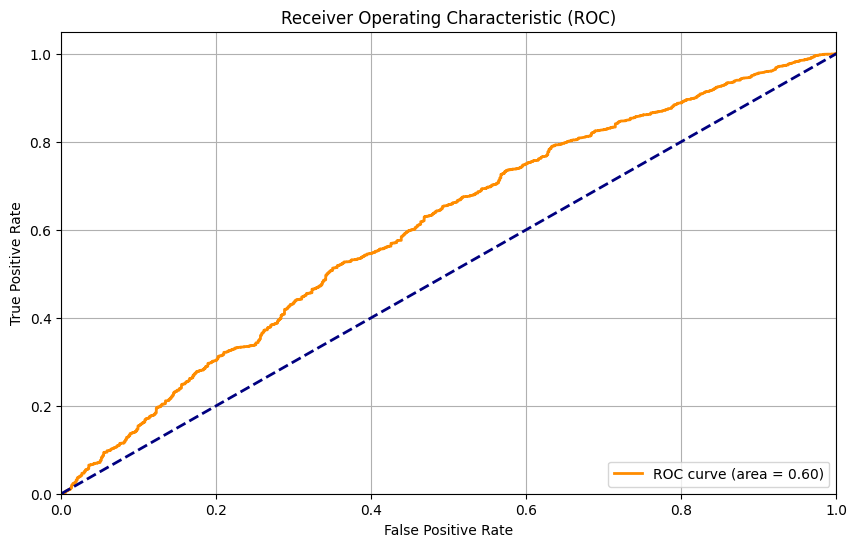

ROC AUC Score: 0.6020706953464421


In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 검증 데이터 준비
x_val = df_val.drop(columns=['target'])
y_val = df_val['target']

# 문자열 레이블을 숫자형으로 변환
y_val_encoded = label_encoder.transform(y_val)

# 최적의 모델 가져오기
best_model = grid_search.best_estimator_

# 검증 데이터에 대한 예측 확률 계산
y_pred_proba = best_model.predict_proba(x_val)

# 클래스 레이블 확인
class_labels = label_encoder.classes_
print(f'Class labels: {class_labels}')

# 'AbNormal' 클래스의 인덱스 찾기
abnormal_index = np.where(class_labels == 'AbNormal')[0]
if len(abnormal_index) == 0:
    raise ValueError("'AbNormal' 클래스가 레이블에 없습니다.")
abnormal_index = abnormal_index[0]
print(f"'AbNormal' 클래스 인덱스: {abnormal_index}")

# 양성 클래스에 대한 확률 추출
# `y_pred_proba`의 열에서 `abnormal_index`에 해당하는 열을 선택합니다.
y_pred_proba_positive = y_pred_proba[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_val_encoded, y_pred_proba_positive)

# AUC 계산
roc_auc = roc_auc_score(y_val_encoded, y_pred_proba_positive)

# ROC 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# ROC AUC 점수 출력
print(f'ROC AUC Score: {roc_auc}')


In [51]:
from sklearn.metrics import roc_curve, f1_score
import numpy as np
positive_class_index = 0

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_val_encoded, y_pred_proba_positive, pos_label=positive_class_index)

# F1 스코어 계산을 위한 임계값 선택
# 각 임계값에서 이진 예측값을 생성
f1_scores = []
for threshold in thresholds:
    y_pred_binary = (y_pred_proba_positive >= threshold).astype(int)
    f1 = f1_score(y_val_encoded, y_pred_binary, pos_label=positive_class_index)
    f1_scores.append(f1)

# 최적의 임계값 찾기
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print(f"최적의 임계값: {best_threshold}")
print(f"최고 F1 스코어: {best_f1_score}")

# 최적 임계값을 사용하여 이진 예측값 생성
y_pred_binary_best = (y_pred_proba_positive >= best_threshold).astype(int)

# 최적 임계값에서의 정확도, F1 스코어, 혼동 행렬 계산
val_accuracy_best = accuracy_score(y_val_encoded, y_pred_binary_best)
val_f1_score_best = f1_score(y_val_encoded, y_pred_binary_best, pos_label=positive_class_index)
cm_best = confusion_matrix(y_val_encoded, y_pred_binary_best)

print(f"최적 임계값에서의 정확도: {val_accuracy_best:.2f}")
print(f"최적 임계값에서의 F1 스코어: {val_f1_score_best:.2f}")
print(f"최적 임계값에서의 혼동 행렬:\n{cm_best}")


최적의 임계값: 0.4739268176251816
최고 F1 스코어: 0.14917293233082707
최적 임계값에서의 정확도: 0.77
최적 임계값에서의 F1 스코어: 0.15
최적 임계값에서의 혼동 행렬:
[[ 248  429]
 [2400 9047]]


In [52]:
y_decoded = label_encoder.inverse_transform(y_pred_binary_best)
y_decoded

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'AbNormal'],
      dtype=object)

In [53]:

# 고유 값과 발생 횟수 계산
unique_values, counts = np.unique(y_val, return_counts=True)

# 결과 출력
value_counts = dict(zip(unique_values, counts))
print(value_counts)

{'AbNormal': 677, 'Normal': 11447}


## 전체 데이터 학습

In [54]:

x_train = df_scaled.drop(columns=['target'])
y_train = df_scaled['target']

# 라벨 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

# EasyEnsembleClassifier의 파라미터를 그리드 서치할 파라미터 정의
param_grid = {
    'easyensembleclassifier__estimator': [
        DecisionTreeClassifier(), 
        LogisticRegression(max_iter=1000), 
        RandomForestClassifier()
    ],
    'easyensembleclassifier__n_estimators': [10, 20, 30]
}

# EasyEnsembleClassifier와 파이프라인 설정
pipeline = Pipeline([
    ('easyensembleclassifier', EasyEnsembleClassifier(random_state=42))
])

# 평가 지표 정의
scorer = make_scorer(f1_score, pos_label=label_encoder.transform(['AbNormal'])[0])

# 그리드 서치 설정
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=3, n_jobs=-1)

# 모델 훈련
grid_search.fit(x_train, y_encoded)

# 최적의 하이퍼파라미터와 성능 출력
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# 최적 모델 선택
best_model = grid_search.best_estimator_

/home/elicer/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'easyensembleclassifier__estimator': RandomForestClassifier(), 'easyensembleclassifier__n_estimators': 10}
Best Score: 0.12108364199340976


## 4. 제출하기


### 테스트 데이터 예측


테스트 데이터 불러오기


In [55]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
test_data

,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,NaN,...,195,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,NaN,...,14,NaN,NaN,256,NaN,NaN,1,NaN,NaN,NaN
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,NaN,...,98,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,NaN,...,14,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,NaN,...,1,NaN,NaN,215,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1XB597-1,1,OK,1000.0,NaN,...,14,NaN,NaN,131,NaN,NaN,1,NaN,NaN,NaN
17357,ffed8923c8a448a98afc641b770be153,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4A1XB974-1,1,OK,1000.0,NaN,...,12,NaN,NaN,279,NaN,NaN,1,NaN,NaN,NaN
17358,fff1e73734da40adbe805359b3efb462,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3L1XA998-1,1,OK,240.0,NaN,...,4,NaN,NaN,66,NaN,NaN,1,NaN,NaN,NaN
17359,fff8e38bdd09470baf95f71e92075dec,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1XC376-1,1,OK,240.0,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN


In [56]:
# Drop columns with more than half of the values missing
drop_cols = []
for column in test_data.columns:
    if (test_data[column].notnull().sum() // 2) < test_data[
        column
    ].isnull().sum():
        drop_cols.append(column)
test_data = test_data.drop(drop_cols, axis=1)

test_data

,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,12.5,...,50,91.8,270.0,50,85,19.8,13.0,195,1,0
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.8,14,256,1
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,2.5,...,50,91.8,270.0,50,85,19.7,1.0,98,1,0
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,20.0,14,0,1
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,2.5,...,119,50.0,91.8,270,50,85.0,19.8,1,215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1XB597-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.5,14,131,1
17357,ffed8923c8a448a98afc641b770be153,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4A1XB974-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.8,12,279,1
17358,fff1e73734da40adbe805359b3efb462,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3L1XA998-1,1,OK,240.0,2.5,...,119,50.0,91.8,270,50,85.0,20.5,4,66,1
17359,fff8e38bdd09470baf95f71e92075dec,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1XC376-1,1,OK,240.0,2.5,...,50,91.8,270.0,50,85,18.9,1.0,117,1,0


In [57]:
# 각 열의 NaN 값 개수 계산
nan_counts = test_data.isnull().sum()

# NaN 값이 있는 열들만 필터링
nan_columns = nan_counts[nan_counts > 0]

nan_columns

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      5468
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    5468
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    5468
dtype: int64

In [58]:
# 각 열의 NaN 값이 있는 행을 표시
nan_dam = test_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].isnull()
nan_fill1 = test_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].isnull()
nan_fill2 = test_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isnull()

# 세 열의 NaN 값이 모두 같은 행에서 발생했는지 확인
nan_same_rows = nan_dam & nan_fill1 & nan_fill2

# NaN 값이 동일한 행의 개수 확인
num_same_nan_rows = nan_same_rows.sum()

# 결과 출력
print(f"세 열에서 NaN 값이 동일한 행의 개수: {num_same_nan_rows}")
print(f"세 열에서 NaN 값이 동일한 행:\n{test_data[nan_same_rows]}")

세 열에서 NaN 값이 동일한 행의 개수: 5468
세 열에서 NaN 값이 동일한 행:
                                 Set ID Wip Line_Dam Process Desc._Dam  \
3      000a6bfd02874c6296dc7b2e9c5678a7      IVI-OB6     Dam Dispenser   
8      00297b6c93e44d49ac534758a23dc74e      IVI-OB6     Dam Dispenser   
9      002d904240d84b188d410d16383a9c3a      IVI-OB6     Dam Dispenser   
10     002fdfad651c4a98b6f0c4046976aac3      IVI-OB6     Dam Dispenser   
13     0039b02541014d678d5b0e5a3cb3797a      IVI-OB6     Dam Dispenser   
...                                 ...          ...               ...   
17349  ffd71ad9aac547a4a367d538c6e3ee30      IVI-OB6     Dam Dispenser   
17354  ffe5c71ef7b045868d177023be7f364b      IVI-OB6     Dam Dispenser   
17355  ffe77be574b24429b1bf6a69b5c2c2ef      IVI-OB6     Dam Dispenser   
17356  ffea508b59934d689b540f95eb3fa730      IVI-OB6     Dam Dispenser   
17358  fff1e73734da40adbe805359b3efb462      IVI-OB6     Dam Dispenser   

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  Insp. 

In [59]:
# 삭제할 열 리스트
columns_to_drop = [
        'Model.Suffix_Fill1', 'Model.Suffix_Fill2', 'Model.Suffix_AutoClave', 
        'Workorder_Fill1', 'Workorder_Fill2', 'Workorder_AutoClave'
]

# 열 삭제
test_data = test_data.drop(columns=columns_to_drop)

# 열 이름 변경
test_data = test_data.rename(columns={
    'Model.Suffix_Dam': 'Model.Suffix',
    'Workorder_Dam': 'Workorder'
})

test_data

,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix,Workorder,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,12.5,...,50,91.8,270.0,50,85,19.8,13.0,195,1,0
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.8,14,256,1
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,2.5,...,50,91.8,270.0,50,85,19.7,1.0,98,1,0
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,20.0,14,0,1
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,2.5,...,119,50.0,91.8,270,50,85.0,19.8,1,215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1XB597-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.5,14,131,1
17357,ffed8923c8a448a98afc641b770be153,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4A1XB974-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.8,12,279,1
17358,fff1e73734da40adbe805359b3efb462,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3L1XA998-1,1,OK,240.0,2.5,...,119,50.0,91.8,270,50,85.0,20.5,4,66,1
17359,fff8e38bdd09470baf95f71e92075dec,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1XC376-1,1,OK,240.0,2.5,...,50,91.8,270.0,50,85,18.9,1.0,117,1,0


In [60]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: test_data[col].iloc[0] for col in test_data.columns if test_data[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
test_data = test_data.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

test_data

삭제된 열의 개수: 35
삭제된 열과 값:
Wip Line_Dam: IVI-OB6
Process Desc._Dam: Dam Dispenser
Insp. Seq No._Dam: 1
Insp Judge Code_Dam: OK
CURE STANDBY POSITION X Collect Result_Dam: 1150
CURE STANDBY POSITION Z Collect Result_Dam: 33.5
CURE STANDBY POSITION Θ Collect Result_Dam: 0
CURE START POSITION Z Collect Result_Dam: 33.5
Wip Line_AutoClave: IVI-OB6
Process Desc._AutoClave: Auto Clave Out
Equipment_AutoClave: Auto Clave Out
Insp. Seq No._AutoClave: 1
Insp Judge Code_AutoClave: OK
1st Pressure Judge Value_AutoClave: OK
2nd Pressure Judge Value_AutoClave: OK
3rd Pressure Judge Value_AutoClave: OK
Wip Line_Fill1: IVI-OB6
Process Desc._Fill1: Fill1 Dispenser
Insp. Seq No._Fill1: 1
Insp Judge Code_Fill1: OK
Wip Line_Fill2: IVI-OB6
Process Desc._Fill2: Fill2 Dispenser
Insp. Seq No._Fill2: 1
Insp Judge Code_Fill2: OK
CURE END POSITION Θ Collect Result_Fill2: -90
CURE STANDBY POSITION X Collect Result_Fill2: 1020
CURE STANDBY POSITION Θ Collect Result_Fill2: 0
CURE START POSITION Θ Collect Result_Fill2

,Set ID,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,0001be084fbc4aaa9d921f39e595961b,Dam dispenser #2,AJX75334501,3J1XF767-1,1000.0,12.5,90,70,280,90,...,50,91.8,270.0,50,85,19.8,13.0,195,1,0
1,0005bbd180064abd99e63f9ed3e1ac80,Dam dispenser #2,AJX75334501,4B1XD472-2,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270,50,85.0,19.8,14,256,1
2,000948934c4140d883d670adcb609584,Dam dispenser #1,AJX75334501,3H1XE355-1,240.0,2.5,-90,70,1030,-90,...,50,91.8,270.0,50,85,19.7,1.0,98,1,0
3,000a6bfd02874c6296dc7b2e9c5678a7,Dam dispenser #2,AJX75334501,3L1XA128-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270,50,85.0,20.0,14,0,1
4,0018e78ce91343678716e2ea27a51c95,Dam dispenser #1,AJX75334501,4A1XA639-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270,50,85.0,19.8,1,215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,Dam dispenser #2,AJX75334501,3K1XB597-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270,50,85.0,19.5,14,131,1
17357,ffed8923c8a448a98afc641b770be153,Dam dispenser #2,AJX75334501,4A1XB974-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270,50,85.0,19.8,12,279,1
17358,fff1e73734da40adbe805359b3efb462,Dam dispenser #1,AJX75334501,3L1XA998-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270,50,85.0,20.5,4,66,1
17359,fff8e38bdd09470baf95f71e92075dec,Dam dispenser #1,AJX75334501,3F1XC376-1,240.0,2.5,-90,70,1030,-90,...,50,91.8,270.0,50,85,18.9,1.0,117,1,0


In [61]:
# 열 이름 정의
column_name = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 데이터프레임에서 숫자와 숫자가 아닌 값으로 구분하여 두 개의 데이터프레임 생성
test_noshift = test_data[pd.to_numeric(test_data[column_name], errors='coerce').notna()]
test_shift = test_data[pd.to_numeric(test_data[column_name], errors='coerce').isna() | (test_data[column_name] == 'OK')]

# 결과 출력
print("숫자인 경우의 데이터프레임 (test_noshift):")
print(test_noshift)

print("\n숫자가 아닌 경우의 데이터프레임 (test_shift):")
print(test_shift)

숫자인 경우의 데이터프레임 (test_noshift):
                                 Set ID     Equipment_Dam Model.Suffix  \
0      0001be084fbc4aaa9d921f39e595961b  Dam dispenser #2  AJX75334501   
2      000948934c4140d883d670adcb609584  Dam dispenser #1  AJX75334501   
5      001fda4596f545d0a3b0ce85fbea77d2  Dam dispenser #1  AJX75334501   
6      0020734a7b29472298358ad58645a0c9  Dam dispenser #1  AJX75334501   
7      00234c5914cd4c4a888d13f8b3773135  Dam dispenser #1  AJX75334501   
...                                 ...               ...          ...   
17343  ffc7abf0560a4d21a348aa387198a14a  Dam dispenser #1  AJX75334501   
17350  ffdb6e67f46946a49a196fb9a5c6cb2d  Dam dispenser #1  AJX75334502   
17353  ffe068b7753a438388a289aaab7d778f  Dam dispenser #1  AJX75334501   
17359  fff8e38bdd09470baf95f71e92075dec  Dam dispenser #1  AJX75334501   
17360  fffa83e0a13d4c2db4fd8bf905b517d4  Dam dispenser #1  AJX75334501   

        Workorder  CURE END POSITION X Collect Result_Dam  \
0      3J1XF767-1  

In [62]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'
end_col = 'WorkMode Collect Result_Dam'

# 열 인덱스 찾기
start_index = test_shift.columns.get_loc(start_col)
end_index = test_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = test_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    test_shift[col] = shifted_values.iloc[:, i]

/tmp/ipykernel_184/578073771.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shift[col] = shifted_values.iloc[:, i]


In [63]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'
end_col = 'WorkMode Collect Result_Fill1'

# 열 인덱스 찾기
start_index = test_shift.columns.get_loc(start_col)
end_index = test_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = test_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    test_shift[col] = shifted_values.iloc[:, i]

/tmp/ipykernel_184/577323871.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shift[col] = shifted_values.iloc[:, i]


In [64]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'
end_col = 'WorkMode Collect Result_Fill2'

# 열 인덱스 찾기
start_index = test_shift.columns.get_loc(start_col)
end_index = test_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = test_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    test_shift[col] = shifted_values.iloc[:, i]

/tmp/ipykernel_184/3086852134.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shift[col] = shifted_values.iloc[:, i]


In [65]:
# 두 데이터프레임 합치기
combined_df = pd.concat([test_shift, test_noshift], axis=0)

# 제거할 열 리스트
columns_to_drop = ['WorkMode Collect Result_Dam', 'WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2']

# 지정한 열 제거
combined_df = combined_df.drop(columns=columns_to_drop)

combined_df= combined_df.sort_index()
combined_df

,Set ID,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,Head Clean Position X Collect Result_Fill2,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2
0,0001be084fbc4aaa9d921f39e595961b,Dam dispenser #2,AJX75334501,3J1XF767-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.0,19.8,13.0,195,1
1,0005bbd180064abd99e63f9ed3e1ac80,Dam dispenser #2,AJX75334501,4B1XD472-2,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.0,19.8,14.0,256,1
2,000948934c4140d883d670adcb609584,Dam dispenser #1,AJX75334501,3H1XE355-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.0,19.7,1.0,98,1
3,000a6bfd02874c6296dc7b2e9c5678a7,Dam dispenser #2,AJX75334501,3L1XA128-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.0,20.0,14.0,0,1
4,0018e78ce91343678716e2ea27a51c95,Dam dispenser #1,AJX75334501,4A1XA639-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.0,19.8,1.0,215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,Dam dispenser #2,AJX75334501,3K1XB597-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.0,19.5,14.0,131,1
17357,ffed8923c8a448a98afc641b770be153,Dam dispenser #2,AJX75334501,4A1XB974-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.0,19.8,12.0,279,1
17358,fff1e73734da40adbe805359b3efb462,Dam dispenser #1,AJX75334501,3L1XA998-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.0,20.5,4.0,66,1
17359,fff8e38bdd09470baf95f71e92075dec,Dam dispenser #1,AJX75334501,3F1XC376-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.0,18.9,1.0,117,1


In [66]:
import pandas as pd

# 원본 데이터프레임의 인덱스 확인
print("test_shift index:")
print(test_shift.index)
print("test_noshift index:")
print(test_noshift.index)

# 두 데이터프레임을 합치기
combined_df = pd.concat([test_shift, test_noshift], axis=0, ignore_index=False)

# 인덱스 확인
print("Combined DataFrame index:")
print(combined_df.index)

# 제거할 열 리스트
columns_to_drop = ['WorkMode Collect Result_Dam', 'WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2']

# 지정한 열 제거
combined_df = combined_df.drop(columns=columns_to_drop)

# 결과 확인
combined_df


test_shift index:
Index([    1,     3,     4,     8,     9,    10,    11,    13,    16,    17,
       ...
       17347, 17348, 17349, 17351, 17352, 17354, 17355, 17356, 17357, 17358],
      dtype='int64', length=10349)
test_noshift index:
Index([    0,     2,     5,     6,     7,    12,    14,    15,    25,    26,
       ...
       17330, 17333, 17335, 17337, 17341, 17343, 17350, 17353, 17359, 17360],
      dtype='int64', length=7012)
Combined DataFrame index:
Index([    1,     3,     4,     8,     9,    10,    11,    13,    16,    17,
       ...
       17330, 17333, 17335, 17337, 17341, 17343, 17350, 17353, 17359, 17360],
      dtype='int64', length=17361)


,Set ID,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,Head Clean Position X Collect Result_Fill2,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2
1,0005bbd180064abd99e63f9ed3e1ac80,Dam dispenser #2,AJX75334501,4B1XD472-2,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.000,19.8,14.0,256,1
3,000a6bfd02874c6296dc7b2e9c5678a7,Dam dispenser #2,AJX75334501,3L1XA128-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.000,20.0,14.0,0,1
4,0018e78ce91343678716e2ea27a51c95,Dam dispenser #1,AJX75334501,4A1XA639-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.000,19.8,1.0,215,1
8,00297b6c93e44d49ac534758a23dc74e,Dam dispenser #1,AJX75334501,4E1XA548-1,240.0,2.5,-90,85,1030,-90,...,119,50.0,91.8,270.0,50,114.612,21.2,3.0,241,6
9,002d904240d84b188d410d16383a9c3a,Dam dispenser #2,AJX75334501,3M1XB525-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.000,19.7,15.0,124,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17343,ffc7abf0560a4d21a348aa387198a14a,Dam dispenser #1,AJX75334501,3J1XC128-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.000,19.1,6.0,290,1
17350,ffdb6e67f46946a49a196fb9a5c6cb2d,Dam dispenser #1,AJX75334502,3J1XC105-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.000,19.2,8.0,167,1
17353,ffe068b7753a438388a289aaab7d778f,Dam dispenser #1,AJX75334501,3G1XA501-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.000,18.7,7.0,231,1
17359,fff8e38bdd09470baf95f71e92075dec,Dam dispenser #1,AJX75334501,3F1XC376-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.000,18.9,1.0,117,1


In [67]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: combined_df[col].iloc[0] for col in combined_df.columns if combined_df[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
combined_df = combined_df.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

combined_df

삭제된 열의 개수: 24
삭제된 열과 값:
HEAD Standby Position X Collect Result_Dam: 257.0
HEAD Standby Position Y Collect Result_Dam: 66
HEAD Standby Position Z Collect Result_Dam: 0.0
Head Clean Position X Collect Result_Dam: 127.5
Head Clean Position Y Collect Result_Dam: 66.0
Head Purge Position X Collect Result_Dam: 257.0
Head Purge Position Y Collect Result_Dam: 66.0
Head Zero Position X Collect Result_Dam: 505.0
HEAD Standby Position X Collect Result_Fill1: 289.0
HEAD Standby Position Y Collect Result_Fill1: 50
HEAD Standby Position Z Collect Result_Fill1: 0.0
Head Clean Position X Collect Result_Fill1: 123.4
Head Clean Position Y Collect Result_Fill1: 50.0
Head Clean Position Z Collect Result_Fill1: 92.2
Head Purge Position X Collect Result_Fill1: 289.0
Head Purge Position Y Collect Result_Fill1: 50
HEAD Standby Position X Collect Result_Fill2: 270.0
HEAD Standby Position Y Collect Result_Fill2: 50
HEAD Standby Position Z Collect Result_Fill2: -10
Head Clean Position X Collect Result_Fill2: 119

,Set ID,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2
1,0005bbd180064abd99e63f9ed3e1ac80,Dam dispenser #2,AJX75334501,4B1XD472-2,1000.0,12.5,90,70,280,90,...,1324.2,1324.2,243.5,243.5,243.5,85.000,19.8,14.0,256,1
3,000a6bfd02874c6296dc7b2e9c5678a7,Dam dispenser #2,AJX75334501,3L1XA128-1,1000.0,12.5,90,70,280,90,...,1324.2,1324.2,243.5,243.5,243.5,85.000,20.0,14.0,0,1
4,0018e78ce91343678716e2ea27a51c95,Dam dispenser #1,AJX75334501,4A1XA639-1,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,19.8,1.0,215,1
8,00297b6c93e44d49ac534758a23dc74e,Dam dispenser #1,AJX75334501,4E1XA548-1,240.0,2.5,-90,85,1030,-90,...,427.9,428.0,243.7,243.7,243.7,114.612,21.2,3.0,241,6
9,002d904240d84b188d410d16383a9c3a,Dam dispenser #2,AJX75334501,3M1XB525-1,1000.0,12.5,90,70,280,90,...,1324.2,1324.2,243.5,243.5,243.5,85.000,19.7,15.0,124,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17343,ffc7abf0560a4d21a348aa387198a14a,Dam dispenser #1,AJX75334501,3J1XC128-1,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,19.1,6.0,290,1
17350,ffdb6e67f46946a49a196fb9a5c6cb2d,Dam dispenser #1,AJX75334502,3J1XC105-1,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,19.2,8.0,167,1
17353,ffe068b7753a438388a289aaab7d778f,Dam dispenser #1,AJX75334501,3G1XA501-1,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,18.7,7.0,231,1
17359,fff8e38bdd09470baf95f71e92075dec,Dam dispenser #1,AJX75334501,3F1XC376-1,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,18.9,1.0,117,1


In [68]:
# 변환할 열들의 리스트
columns_to_convert = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']

# 각 열을 float로 변환
for col in columns_to_convert:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

combined_df[columns_to_convert].dtypes

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    float64
dtype: object

In [69]:
from itertools import combinations
from collections import defaultdict

# 동일한 값을 가지는 열 쌍을 저장할 리스트
equal_columns = []

# 열 이름들의 모든 쌍을 생성하여 비교
for col1, col2 in combinations(combined_df.columns, 2):
    if combined_df[col1].equals(combined_df[col2]):
        equal_columns.append((col1, col2))

# 열 쌍을 그룹화하여 저장할 딕셔너리
grouped_columns = defaultdict(set)

# 열 쌍을 그룹화
for col1, col2 in equal_columns:
    grouped_columns[col1].add(col2)
    grouped_columns[col2].add(col1)

# 방문한 열을 추적할 집합
visited = set()

# 그룹화된 열 쌍 출력
print("같은 값을 가지는 열 그룹:")
for col, group in grouped_columns.items():
    if col not in visited:
        # 현재 열과 연결된 모든 열을 그룹으로 묶기
        group.add(col)
        visited.update(group)
        print(f"그룹: {', '.join(group)}")

같은 값을 가지는 열 그룹:
그룹: CURE END POSITION Θ Collect Result_Dam, CURE START POSITION Θ Collect Result_Dam
그룹: HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam, HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam, HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
그룹: Receip No Collect Result_Fill1, Receip No Collect Result_Dam, Receip No Collect Result_Fill2
그룹: Stage1 Circle1 Distance Speed Collect Result_Dam, Stage1 Circle4 Distance Speed Collect Result_Dam, Stage1 Circle3 Distance Speed Collect Result_Dam, Stage1 Line2 Distance Speed Collect Result_Dam, Stage1 Line4 Distance Speed Collect Result_Dam, Stage1 Circle2 Distance Speed Collect Result_Dam
그룹: Stage2 Circle3 Distance Speed Collect Result_Dam, Stage2 Circle1 Distance Speed Collect Result_Dam, Stage2 Circle2 Distance Speed Collect Result_Dam, Stage2 Circle4 Distance Speed Collect Result_Dam
그룹: Stage2 Line4 Distance Speed Collect Result_Dam, Stage2 Line2 Distance Speed Collect Result_Dam
그룹: Stage3 Circle4 Dista

In [70]:
# 삭제할 열 목록
columns_to_drop = [
    'CURE END POSITION Θ Collect Result_Dam',

    'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
    'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',

    'Stage1 Circle2 Distance Speed Collect Result_Dam',
    'Stage1 Circle3 Distance Speed Collect Result_Dam',
    'Stage1 Circle4 Distance Speed Collect Result_Dam',
    'Stage1 Line2 Distance Speed Collect Result_Dam',
    'Stage1 Line4 Distance Speed Collect Result_Dam',

    'Stage2 Circle2 Distance Speed Collect Result_Dam',
    'Stage2 Circle3 Distance Speed Collect Result_Dam',
    'Stage2 Circle4 Distance Speed Collect Result_Dam',

    'Stage2 Line4 Distance Speed Collect Result_Dam',

    'Stage3 Circle2 Distance Speed Collect Result_Dam',
    'Stage3 Circle3 Distance Speed Collect Result_Dam',
    'Stage3 Circle4 Distance Speed Collect Result_Dam',
    'Stage3 Line2 Distance Speed Collect Result_Dam',
    'Stage3 Line4 Distance Speed Collect Result_Dam',

    'CURE STANDBY POSITION Z Collect Result_Fill2',

    'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',

    'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
    'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2',
    
    'Workorder'
]

# 열 삭제
combined_df = combined_df.drop(columns=columns_to_drop)

# 결과 확인
combined_df

,Set ID,Equipment_Dam,Model.Suffix,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,...,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2
1,0005bbd180064abd99e63f9ed3e1ac80,Dam dispenser #2,AJX75334501,1000.0,12.5,70,280,90,16,14.2,...,499.8,694.0,1324.2,1324.2,243.5,85.000,19.8,14.0,256,1
3,000a6bfd02874c6296dc7b2e9c5678a7,Dam dispenser #2,AJX75334501,1000.0,12.5,70,280,90,10,21.3,...,499.8,694.0,1324.2,1324.2,243.5,85.000,20.0,14.0,0,1
4,0018e78ce91343678716e2ea27a51c95,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,16,13.2,...,458.0,156.0,428.0,427.9,243.7,85.000,19.8,1.0,215,1
8,00297b6c93e44d49ac534758a23dc74e,Dam dispenser #1,AJX75334501,240.0,2.5,85,1030,-90,16,14.9,...,458.0,156.0,428.0,427.9,243.7,114.612,21.2,3.0,241,6
9,002d904240d84b188d410d16383a9c3a,Dam dispenser #2,AJX75334501,1000.0,12.5,70,280,90,16,13.2,...,499.8,694.0,1324.2,1324.2,243.5,85.000,19.7,15.0,124,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17343,ffc7abf0560a4d21a348aa387198a14a,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,10,17.0,...,458.0,156.0,428.0,427.9,243.7,85.000,19.1,6.0,290,1
17350,ffdb6e67f46946a49a196fb9a5c6cb2d,Dam dispenser #1,AJX75334502,240.0,2.5,70,1030,-90,10,17.0,...,458.0,156.0,428.0,427.9,243.7,85.000,19.2,8.0,167,1
17353,ffe068b7753a438388a289aaab7d778f,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,10,9.6,...,458.0,156.0,428.0,427.9,243.7,85.000,18.7,7.0,231,1
17359,fff8e38bdd09470baf95f71e92075dec,Dam dispenser #1,AJX75334501,240.0,2.5,70,1030,-90,10,9.7,...,458.0,156.0,428.0,427.9,243.7,85.000,18.9,1.0,117,1


In [71]:
# 'target'을 리스트에서 제거
if 'target' in select_feature:
    select_feature.remove('target')
# 'Set ID'를 리스트에 추가
select_feature.append('Set ID')

test_data = combined_df[select_feature]

In [72]:
categorical_features

['Equipment_Dam', 'Equipment_Fill1', 'Equipment_Fill2']

In [73]:
test_data[categorical_features] = encoder.transform(test_data[categorical_features])

test_data[categorical_features]

/tmp/ipykernel_184/2240298792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[categorical_features] = encoder.transform(test_data[categorical_features])


,Equipment_Dam,Equipment_Fill1,Equipment_Fill2
1,1.0,1.0,1.0
3,1.0,1.0,1.0
4,0.0,0.0,0.0
8,0.0,0.0,0.0
9,1.0,1.0,1.0
...,...,...,...
17343,0.0,0.0,0.0
17350,0.0,0.0,0.0
17353,0.0,0.0,0.0
17359,0.0,0.0,0.0


In [74]:
condition_receip = (
    (test_data['Receip No Collect Result_Dam'] != test_data['Receip No Collect Result_Fill1']) |
    (test_data['Receip No Collect Result_Dam'] != test_data['Receip No Collect Result_Fill2']) |
    (test_data['Receip No Collect Result_Fill1'] != test_data['Receip No Collect Result_Fill2'])
)

condition_production_qty = (
    (test_data['Production Qty Collect Result_Dam'] != test_data['Production Qty Collect Result_Fill1']) |
    (test_data['Production Qty Collect Result_Dam'] != test_data['Production Qty Collect Result_Fill2']) |
    (test_data['Production Qty Collect Result_Fill1'] != test_data['Production Qty Collect Result_Fill2'])
)

condition_palletid = (
    (test_data['PalletID Collect Result_Dam'] != test_data['PalletID Collect Result_Fill1']) |
    (test_data['PalletID Collect Result_Dam'] != test_data['PalletID Collect Result_Fill2']) |
    (test_data['PalletID Collect Result_Fill1'] != test_data['PalletID Collect Result_Fill2'])
)

# abnormal로 제외할 조건들
test_equip1 = test_data[categorical_features].eq(0).all(axis=1)
test_equip2 = test_data[categorical_features].eq(1).all(axis=1)
condition_equip_different = ~test_equip1 & ~test_equip2

# 네 조건 중 하나라도 만족하면 불량으로 분류
condition_abnormal = condition_receip | condition_production_qty | condition_palletid | condition_equip_different

# 불량 데이터와 정상 데이터로 분리
test_match_abnormal = test_data[condition_abnormal]  # 매치 불량 데이터
test_filtered = test_data[~condition_abnormal]  # 정상 데이터



test_filtered = test_filtered.drop(columns=['Set ID'])


In [75]:
test_data

,Equipment_Dam,Equipment_Fill1,Equipment_Fill2,PalletID Collect Result_Dam,PalletID Collect Result_Fill1,PalletID Collect Result_Fill2,Production Qty Collect Result_Dam,Production Qty Collect Result_Fill1,Production Qty Collect Result_Fill2,Receip No Collect Result_Dam,...,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Machine Tact time Collect Result_Fill1,Set ID
1,1.0,1.0,1.0,14.0,14.0,14.0,256,256,256,1,...,6000,6000,6000,241,1,121,56,363,57.4,0005bbd180064abd99e63f9ed3e1ac80
3,1.0,1.0,1.0,14.0,14.0,14.0,0,0,0,1,...,4000,4000,4000,241,90,121,52,452,68.3,000a6bfd02874c6296dc7b2e9c5678a7
4,0.0,0.0,0.0,1.0,1.0,1.0,215,215,215,1,...,6500,6500,6500,241,1,121,54,363,54.3,0018e78ce91343678716e2ea27a51c95
8,0.0,0.0,0.0,3.0,3.0,3.0,241,241,241,6,...,5800,5800,5800,240,1,120,51,361,56.0,00297b6c93e44d49ac534758a23dc74e
9,1.0,1.0,1.0,15.0,15.0,15.0,124,124,124,1,...,6500,6500,6500,241,1,121,54,363,56.2,002d904240d84b188d410d16383a9c3a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17343,0.0,0.0,0.0,6.0,6.0,6.0,290,290,290,1,...,5000,5000,5000,241,121,121,49,483,52.8,ffc7abf0560a4d21a348aa387198a14a
17350,0.0,0.0,0.0,8.0,8.0,8.0,167,167,167,1,...,5000,5000,5000,241,121,121,50,483,51.9,ffdb6e67f46946a49a196fb9a5c6cb2d
17353,0.0,0.0,0.0,7.0,7.0,7.0,231,231,231,1,...,9000,9000,9000,300,60,120,49,480,91.4,ffe068b7753a438388a289aaab7d778f
17359,0.0,0.0,0.0,1.0,1.0,1.0,117,117,117,1,...,9000,9000,9000,300,60,150,54,510,91.0,fff8e38bdd09470baf95f71e92075dec


In [76]:
test_filtered

,Equipment_Dam,Equipment_Fill1,Equipment_Fill2,PalletID Collect Result_Dam,PalletID Collect Result_Fill1,PalletID Collect Result_Fill2,Production Qty Collect Result_Dam,Production Qty Collect Result_Fill1,Production Qty Collect Result_Fill2,Receip No Collect Result_Dam,...,Stage1 Line3 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Machine Tact time Collect Result_Fill1
1,1.0,1.0,1.0,14.0,14.0,14.0,256,256,256,1,...,6000,6000,6000,6000,241,1,121,56,363,57.4
3,1.0,1.0,1.0,14.0,14.0,14.0,0,0,0,1,...,4000,4000,4000,4000,241,90,121,52,452,68.3
4,0.0,0.0,0.0,1.0,1.0,1.0,215,215,215,1,...,6500,6500,6500,6500,241,1,121,54,363,54.3
8,0.0,0.0,0.0,3.0,3.0,3.0,241,241,241,6,...,5600,5800,5800,5800,240,1,120,51,361,56.0
9,1.0,1.0,1.0,15.0,15.0,15.0,124,124,124,1,...,6500,6500,6500,6500,241,1,121,54,363,56.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17343,0.0,0.0,0.0,6.0,6.0,6.0,290,290,290,1,...,5000,5000,5000,5000,241,121,121,49,483,52.8
17350,0.0,0.0,0.0,8.0,8.0,8.0,167,167,167,1,...,5000,5000,5000,5000,241,121,121,50,483,51.9
17353,0.0,0.0,0.0,7.0,7.0,7.0,231,231,231,1,...,9000,9000,9000,9000,300,60,120,49,480,91.4
17359,0.0,0.0,0.0,1.0,1.0,1.0,117,117,117,1,...,9000,9000,9000,9000,300,60,150,54,510,91.0


In [77]:
# 구분하느라 사용한 학습에 필요없는 컬럼 제외 
test_filtered.drop(columns=remove_columns, inplace=True)

# 수치형 데이터만 선택
test_numeric = test_filtered.select_dtypes(include=['float64', 'int64'])

# Scaling test data
test_scaled = scaler.transform(test_numeric)

# 데이터프레임으로 변환
test_scaled_df = pd.DataFrame(test_scaled, columns=test_numeric.columns)

test_scaled_df

,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,Machine Tact time Collect Result_Dam,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Machine Tact time Collect Result_Fill1
0,-0.019526,-0.017009,-0.277861,-0.273014,-0.600541,-0.265363,-0.261518,-0.247757,-0.264749,-0.260857,-0.260159,-0.183821,-0.996753,-0.126205,1.496322,-0.998991,-0.568963
1,1.877179,1.885093,1.256325,1.268960,0.276204,-1.453627,-1.452795,-1.433140,-1.452931,-1.452279,-1.451491,-0.183821,0.588851,-0.126205,0.107060,0.458620,0.170106
2,-0.286668,-0.284910,-0.492647,-0.488890,-1.028557,0.031703,0.036301,0.048589,0.032296,0.036998,0.037674,-0.183821,-0.996753,-0.126205,0.801691,-0.998991,-0.779157
3,0.167473,0.116942,1.685897,1.639034,0.207169,-0.384189,-0.380646,-0.484833,-0.383567,-0.379999,-0.379293,-0.230426,-0.996753,-0.240396,-0.240256,-1.031747,-0.663889
4,-0.286668,-0.311701,1.133590,1.114762,-0.849066,0.031703,0.036301,0.048589,0.032296,0.036998,0.037674,-0.183821,-0.996753,-0.126205,0.801691,-0.998991,-0.650328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17328,0.728470,0.733116,0.335813,0.343776,-0.876680,-0.859495,-0.857156,-0.840448,-0.858840,-0.856568,-0.855825,-0.183821,1.141140,-0.126205,-0.934887,0.966327,-0.880863
17329,0.728470,0.759906,0.335813,0.343776,-0.897391,-0.859495,-0.857156,-0.840448,-0.858840,-0.856568,-0.855825,-0.183821,1.141140,-0.126205,-0.587571,0.966327,-0.941887
17330,-1.248377,-1.222566,-1.259740,-1.259877,1.587868,1.517033,1.525397,1.530318,1.517523,1.526276,1.526838,2.565883,0.054378,-0.240396,-0.934887,0.917194,1.736390
17331,-1.221663,-1.222566,-1.259740,-1.259877,1.587868,1.517033,1.525397,1.530318,1.517523,1.526276,1.526838,2.565883,0.054378,3.185321,0.801691,1.408523,1.709268


In [78]:
# 검증 데이터에 대한 예측 확률 계산
y_pred_proba_test = best_model.predict_proba(test_scaled_df)

# 양성 클래스에 대한 확률 추출
# `y_pred_proba`의 열에서 `abnormal_index`에 해당하는 열을 선택합니다.
y_test_pred = y_pred_proba_test[:, 1]

threshold = 0.4739268176251816
final_predictions = (y_test_pred >= threshold).astype(int)

y_decoded = label_encoder.inverse_transform(final_predictions)
y_decoded

# 예측 결과를 포함하는 DataFrame 생성
final_predictions_df = pd.DataFrame({
    'index': test_scaled_df.index,
    'prediction': y_decoded
})

# test_scaled_df와 final_predictions_df를 병합
result = test_scaled_df.merge(final_predictions_df, left_index=True, right_on='index', how='left')

# NaN 값을 'AbNormal'로 채우기
result['prediction'].fillna('AbNormal', inplace=True)

# 결과 확인
print(result[['prediction']])

      prediction
0         Normal
1         Normal
2         Normal
3       AbNormal
4         Normal
...          ...
17328     Normal
17329     Normal
17330   AbNormal
17331     Normal
17332     Normal

[17333 rows x 1 columns]


In [81]:
result[['prediction']]

,prediction
0,Normal
1,Normal
2,Normal
3,AbNormal
4,Normal
...,...
17328,Normal
17329,Normal
17330,AbNormal
17331,Normal


In [ ]:
test_data

### 제출 파일 작성


In [82]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("./submission.csv")
df_sub["target"] = result['prediction']

# 제출 파일 저장
df_sub.to_csv("./submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**
